<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df =pd.read_csv("/content/bank-full.csv", delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.duplicated().sum()

0

#EDA

In [ ]:
column_value_counts = {}
for column in df.columns:
  if df[column].dtype=='object':
    column_value_counts[column] = df[column].value_counts()

for column, value_counts in column_value_counts.items():
    print(f"Value counts for column '{column}':\n{value_counts}\n")
    print(" ")

Value counts for column 'job':
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 
Value counts for column 'marital':
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 
Value counts for column 'education':
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 
Value counts for column 'default':
no     44396
yes      815
Name: default, dtype: int64

 
Value counts for column 'housing':
yes    25130
no     20081
Name: housing, dtype: int64

 
Value counts for column 'loan':
no     37967
yes     7244
Name: loan, dtype: int64

 
Value counts for column 'contact':
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 
Value counts for co

In [ ]:
mode_values = df.mode().iloc[0]

# Iterate through each column and replace 'unknown' with the mode value
for column in df.columns:
    df[column] = df[column].replace('unknown', mode_values[column])

In [ ]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
column_value_counts = {}
for column in df.columns:
  if df[column].dtype=='object':
    column_value_counts[column] = df[column].value_counts()

for column, value_counts in column_value_counts.items():
    print(f"Value counts for column '{column}':\n{value_counts}\n")
    print(" ")

Value counts for column 'job':
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

 
Value counts for column 'marital':
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 
Value counts for column 'education':
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

 
Value counts for column 'default':
no     44396
yes      815
Name: default, dtype: int64

 
Value counts for column 'housing':
yes    25130
no     20081
Name: housing, dtype: int64

 
Value counts for column 'loan':
no     37967
yes     7244
Name: loan, dtype: int64

 
Value counts for column 'contact':
cellular     42305
telephone     2906
Name: contact, dtype: int64

 
Value counts for column 'month':
may    13766
jul     6895
aug     6

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#UNIVARIATE ANALYSIS

For age


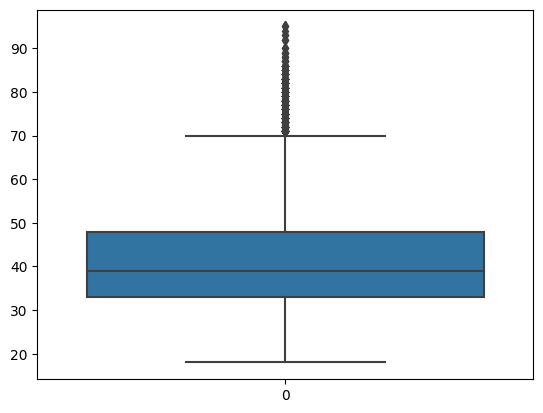

For balance


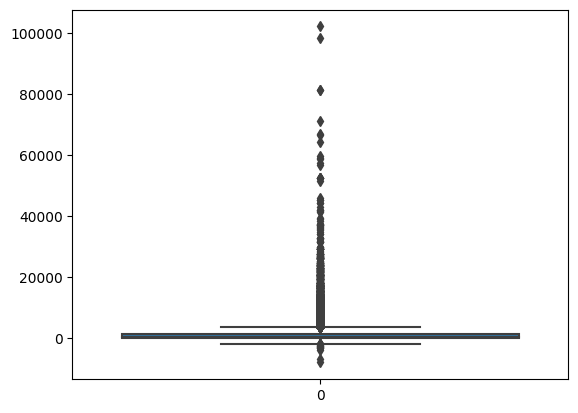

For day


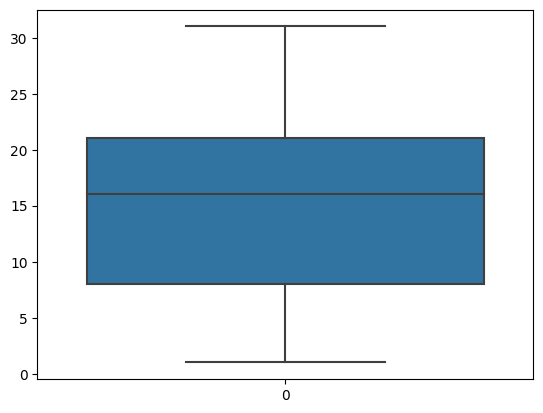

For duration


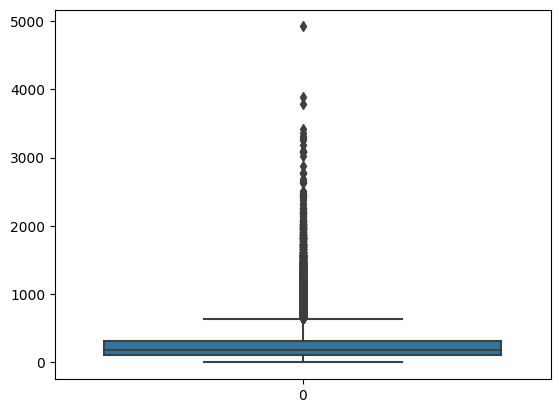

For campaign


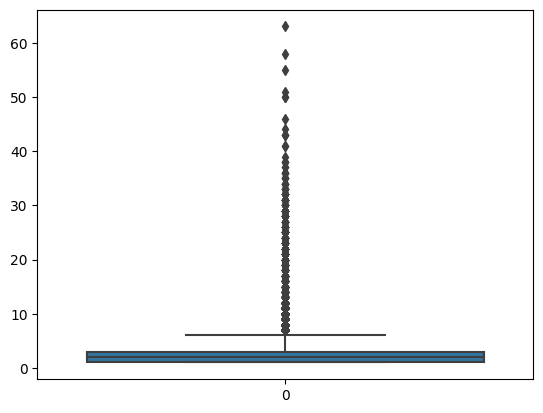

For pdays


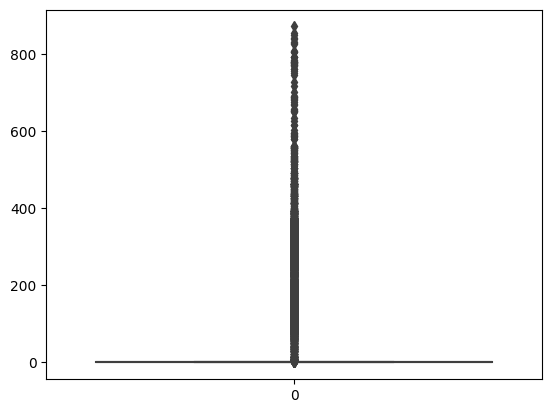

For previous


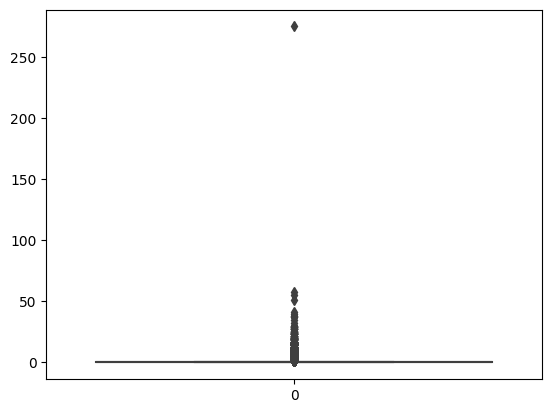

In [ ]:
for i in df.columns:
  if df[i].dtype=='int' or df[i].dtype=='float':
    print("For",i)
    sns.boxplot(df[i])
    plt.show()


In [ ]:
Q3 = df['age'].quantile(q=0.75)
Q1 = df['age'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['age'], down, up)
print(a)
df['age'] = a

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    70.5
45208    70.5
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64


<Axes: >

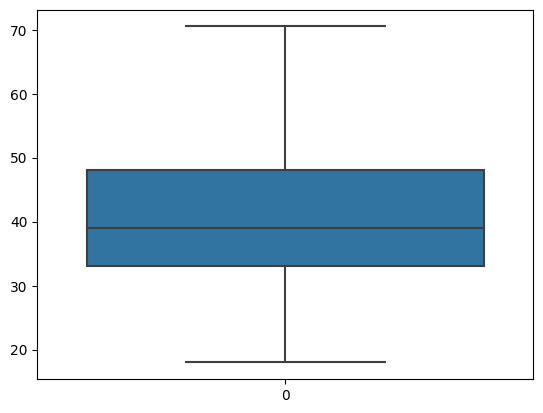

In [ ]:
sns.boxplot(df['age'])

In [ ]:
Q3 = df['balance'].quantile(q=0.75)
Q1 = df['balance'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['balance'], down, up)
print(b)
df['balance'] = b

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    3462
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64


In [ ]:
Q3 = df['duration'].quantile(q=0.75)
Q1 = df['duration'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['duration'], down, up)
print(c)
df['duration'] = c

0        261
1        151
2         76
3         92
4        198
        ... 
45206    643
45207    456
45208    643
45209    508
45210    361
Name: duration, Length: 45211, dtype: int64


In [ ]:
Q3 = df['campaign'].quantile(q=0.75)
Q1 = df['campaign'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['campaign'], down, up)
print(d)
df['campaign'] = d

0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: campaign, Length: 45211, dtype: int64


In [ ]:
Q3 = df['pdays'].quantile(q=0.75)
Q1 = df['pdays'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df['pdays'], down, up)
print(e)
df['pdays'] = e

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
45206   -1
45207   -1
45208   -1
45209   -1
45210   -1
Name: pdays, Length: 45211, dtype: int64


In [ ]:
Q3 = df['previous'].quantile(q=0.75)
Q1 = df['previous'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df['previous'], down, up)
print(f)
df['previous'] = f

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: previous, Length: 45211, dtype: int64


For age


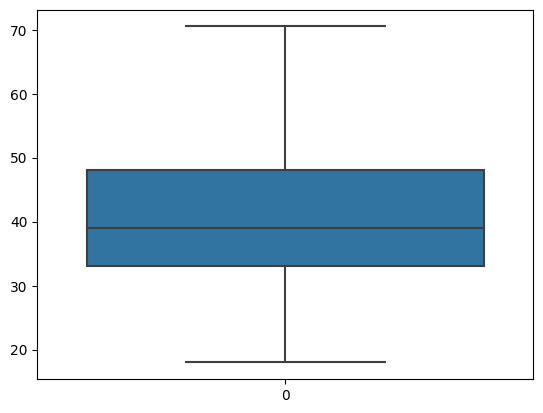

For balance


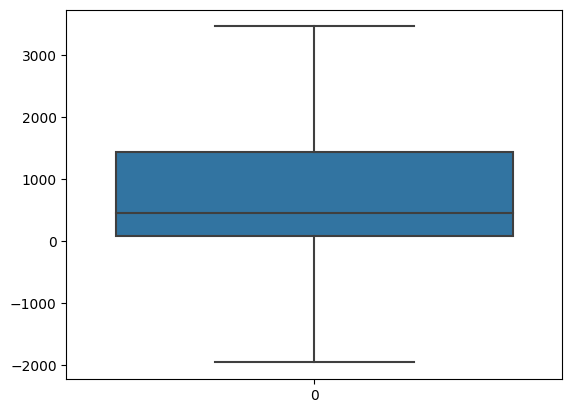

For day


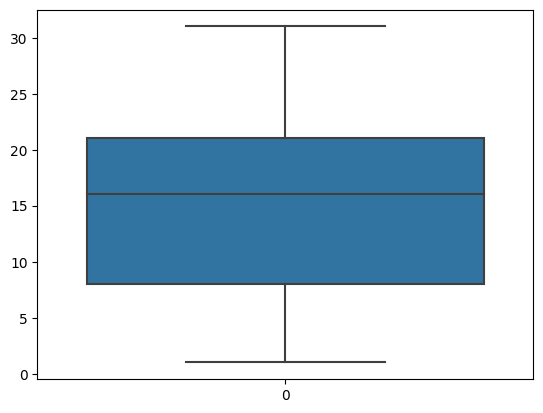

For duration


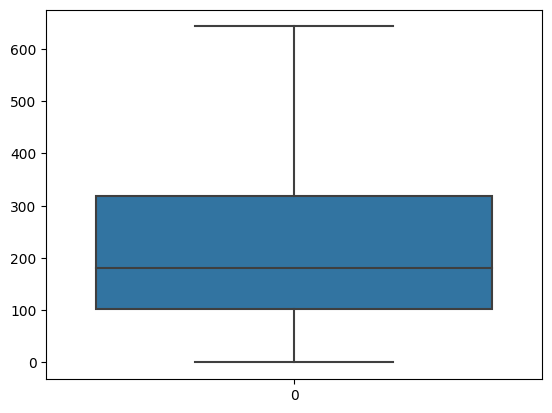

For campaign


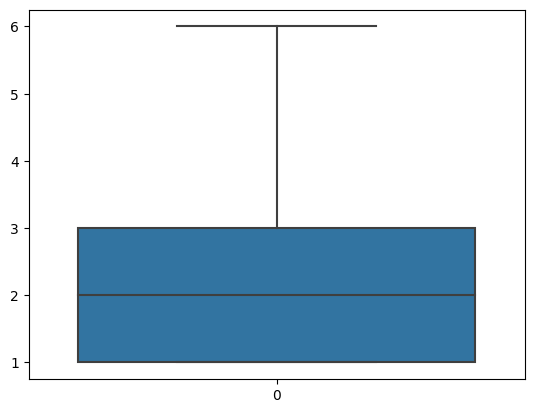

For pdays


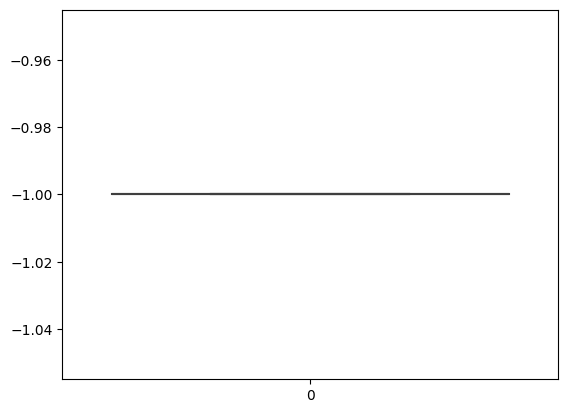

For previous


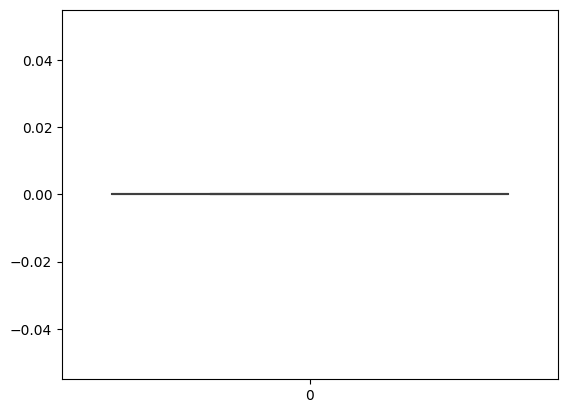

In [ ]:
for i in df.columns:
  if df[i].dtype=='int' or df[i].dtype=='float':
    print("For",i)
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['default','housing','loan','campaign','pdays','previous','poutcome'], drop_first=True)

In [ ]:
df.head()

,age,job,marital,education,balance,contact,day,month,duration,y,...,housing_yes,loan_yes,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,management,married,tertiary,2143,cellular,5,may,261,no,...,1,0,0,0,0,0,0,0,0,1
1,44.0,technician,single,secondary,29,cellular,5,may,151,no,...,1,0,0,0,0,0,0,0,0,1
2,33.0,entrepreneur,married,secondary,2,cellular,5,may,76,no,...,1,1,0,0,0,0,0,0,0,1
3,47.0,blue-collar,married,secondary,1506,cellular,5,may,92,no,...,1,0,0,0,0,0,0,0,0,1
4,33.0,blue-collar,single,secondary,1,cellular,5,may,198,no,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
col = df.pop('y')
df['y'] = col

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45211 non-null  float64
 1   job               45211 non-null  object 
 2   marital           45211 non-null  object 
 3   education         45211 non-null  object 
 4   balance           45211 non-null  int64  
 5   contact           45211 non-null  object 
 6   day               45211 non-null  int64  
 7   month             45211 non-null  object 
 8   duration          45211 non-null  int64  
 9   default_yes       45211 non-null  uint8  
 10  housing_yes       45211 non-null  uint8  
 11  loan_yes          45211 non-null  uint8  
 12  campaign_2        45211 non-null  uint8  
 13  campaign_3        45211 non-null  uint8  
 14  campaign_4        45211 non-null  uint8  
 15  campaign_5        45211 non-null  uint8  
 16  campaign_6        45211 non-null  uint8 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['job'] = label.fit_transform(df['job'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['marital'] = label.fit_transform(df['marital'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['education'] = label.fit_transform(df['education'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['contact'] = label.fit_transform(df['contact'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['month'] = label.fit_transform(df['month'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['y'] = label.fit_transform(df['y'])

In [ ]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

#BIVARIATE ANALYSIS

<Axes: >

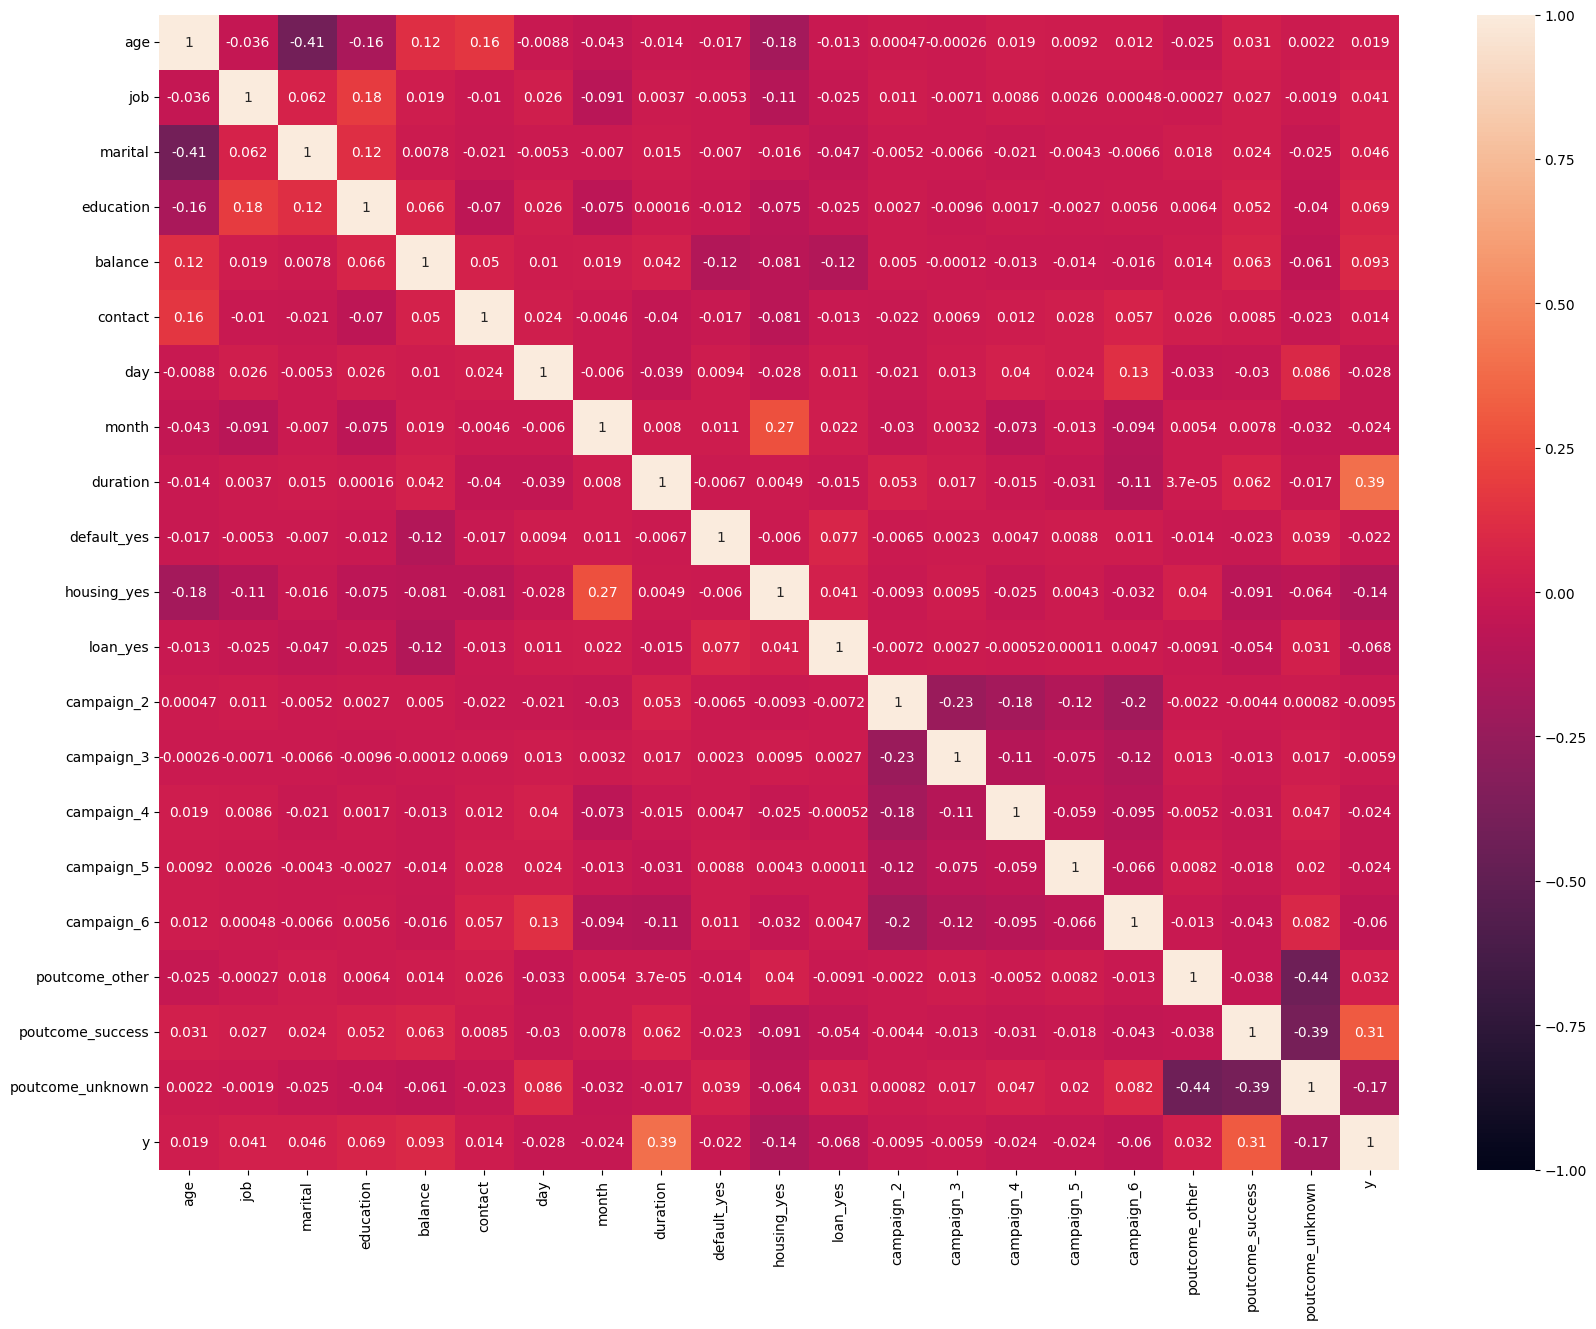

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

#MODEL BUILDING

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('y', axis=1)
Y = df['y']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_train, Y_train)

0.885771163143426

In [ ]:
model.score(X_test, Y_test)

0.8874225892067237

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print(metrics.accuracy_score(Y_train, y_pred_train))
print(metrics.accuracy_score(Y_test, y_pred_test))

0.885771163143426
0.8874225892067237


In [ ]:
print(classification_report(Y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     27923
           1       0.54      0.22      0.31      3724

    accuracy                           0.89     31647
   macro avg       0.72      0.60      0.63     31647
weighted avg       0.86      0.89      0.86     31647



In [ ]:
print(classification_report(Y_test, y_pred_test ))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11999
           1       0.53      0.23      0.32      1565

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



In [ ]:
#Maintaining the balance between the recall score and precision is important. Let's see it with the help of AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logit_roc_auc = roc_auc_score(Y_test, y_pred_test)
logit_roc_auc

0.6004869149106409

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45211 non-null  float64
 1   job               45211 non-null  int64  
 2   marital           45211 non-null  int64  
 3   education         45211 non-null  int64  
 4   balance           45211 non-null  int64  
 5   contact           45211 non-null  int64  
 6   day               45211 non-null  int64  
 7   month             45211 non-null  int64  
 8   duration          45211 non-null  int64  
 9   default_yes       45211 non-null  uint8  
 10  housing_yes       45211 non-null  uint8  
 11  loan_yes          45211 non-null  uint8  
 12  campaign_2        45211 non-null  uint8  
 13  campaign_3        45211 non-null  uint8  
 14  campaign_4        45211 non-null  uint8  
 15  campaign_5        45211 non-null  uint8  
 16  campaign_6        45211 non-null  uint8 

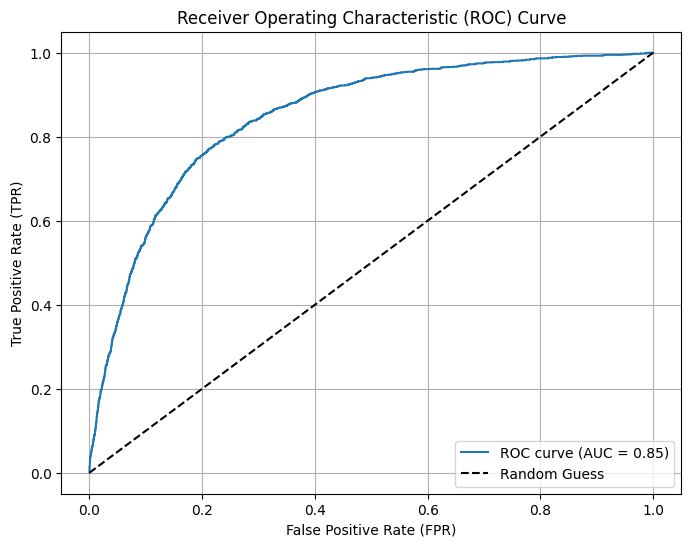

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=4,min_samples_leaf=5)

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=4)

In [ ]:
dt.score(X_train, Y_train)

0.9066262204948337

In [ ]:
dt.score(X_test, Y_test)

0.9001769389560602

In [ ]:
dc_pred_test = dt.predict(X_test)

In [ ]:
dec_roc_auc = roc_auc_score(Y_test, dc_pred_test)
dec_roc_auc

0.6899301778875608

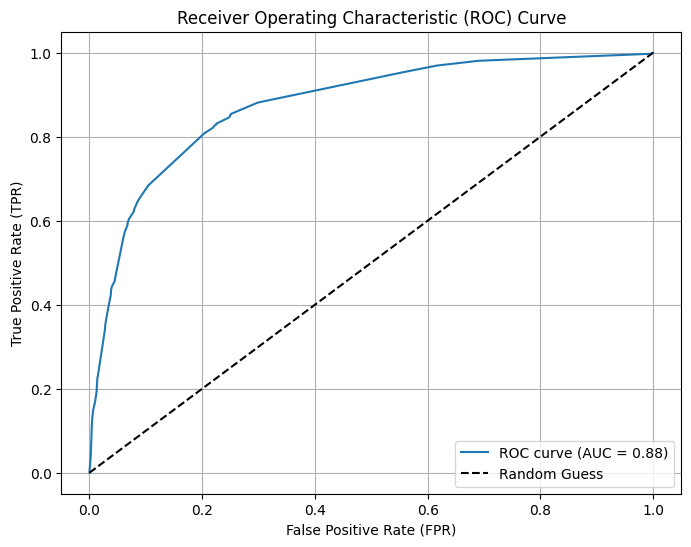

In [ ]:
y_prob = dt.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
nb_classifier = GaussianNB()

In [ ]:
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
nb_classifier.score(X_train, Y_train)

0.8694031029797453

In [ ]:
nb_classifier.score(X_test, Y_test)

0.8705396638159835

In [ ]:
nb_pred_train = nb_classifier.predict(X_train)
nb_pred_test = nb_classifier.predict(X_test)

In [ ]:
print(classification_report(Y_test, nb_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11999
           1       0.44      0.43      0.43      1565

    accuracy                           0.87     13564
   macro avg       0.68      0.68      0.68     13564
weighted avg       0.87      0.87      0.87     13564



In [ ]:
dec_roc_auc = roc_auc_score(Y_test, dc_pred_test)
dec_roc_auc

0.6899301778875608

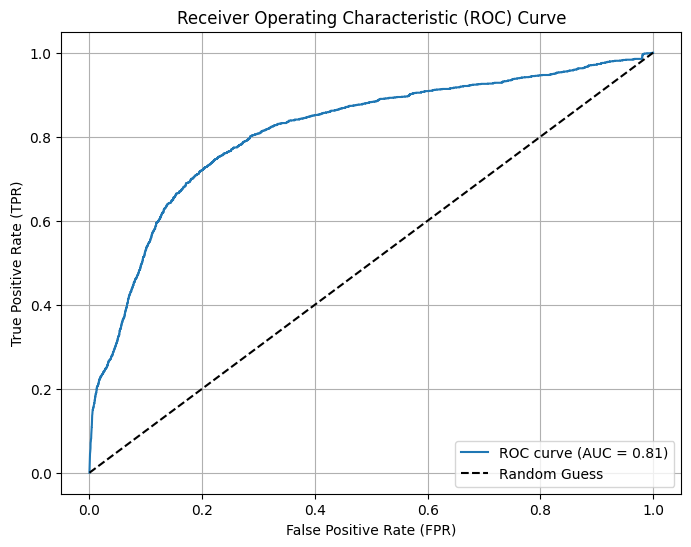

In [ ]:
y_prob = nb_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')
knn.fit(X_train_Scaled, Y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.score(X_train_Scaled, Y_train)

0.9132619205611906

In [ ]:
knn.score(X_test_Scaled, Y_test)

0.8896343261574756

In [ ]:
knn_pred_train = knn.predict(X_train_Scaled)
knn_pred_test = knn.predict(X_test_Scaled)

In [ ]:
knn_roc_auc = roc_auc_score(Y_test, knn_pred_test)
knn_roc_auc

0.6289632495998734

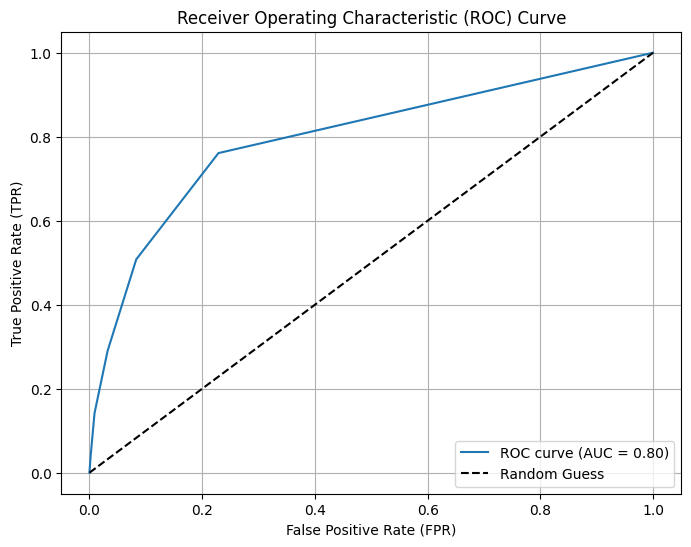

In [ ]:
y_prob = knn.predict_proba(X_test_Scaled)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#XGBOOST
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(n_estimators=100, max_depth=6, max_leaves=10,gamma=1, learning_rate=0.003)

In [ ]:
xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.003, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xg.score(X_train, Y_train)

0.906025847631687

In [ ]:
xg.score(X_test, Y_test)

0.9012828074314362

In [ ]:
xg_roc_auc = roc_auc_score(Y_test, knn_pred_test)
xg_roc_auc

0.6289632495998734

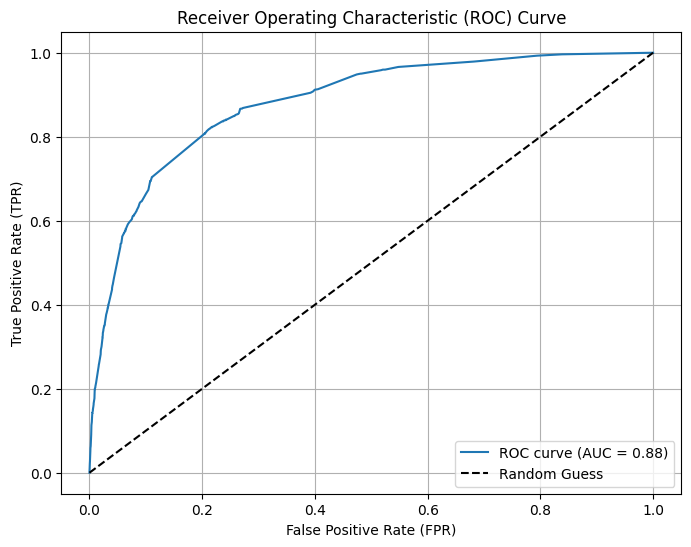

In [ ]:
y_prob = xg.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
results = pd.DataFrame(dtype='int', columns=[['Train_Accuracy', 'Test_Accuracy', 'AUC-Score']], index=['LogisticReg', 'DecisionTreeClassifier', 'NaiveBayes', 'KNN', 'XG' ])

In [ ]:
results

,Train_Accuracy,Test_Accuracy,AUC-Score
LogisticReg,NaN,NaN,NaN
DecisionTreeClassifier,NaN,NaN,NaN
NaiveBayes,NaN,NaN,NaN
KNN,NaN,NaN,NaN
XG,NaN,NaN,NaN


In [ ]:
results['Train_Accuracy'] = ['0.885771163143426','0.9066262204948337','0.8694031029797453','0.9132619205611906','0.906025847631687']
results['Test_Accuracy'] = ['0.8874225892067237','0.9001769389560602','0.8705396638159835','0.8896343261574756','0.9012828074314362']
results['AUC-Score'] = ['0.85','0.88','0.81','0.80','0.88']

In [ ]:
results

,Train_Accuracy,Test_Accuracy,AUC-Score
LogisticReg,0.885771163143426,0.8874225892067237,0.85
DecisionTreeClassifier,0.9066262204948337,0.9001769389560602,0.88
NaiveBayes,0.8694031029797453,0.8705396638159835,0.81
KNN,0.9132619205611906,0.8896343261574756,0.80
XG,0.906025847631687,0.9012828074314362,0.88


#Hence, we can see that the model can give its best predictions with XGBoost.